# Getting to know the Skyline

In [1]:
%matplotlib widget

#TODO: Get to know the skyline
#      - Get more info about activities on skyline from Alin
#      - Skyline peaks
#      - Skyline Expectation Maximization
#      - Shadow of skyline

#XXX: Was bedeutet die Skyline?
#XXX: Predict if activity on skyline? 

#Other 
#TODO: left align then split: For consistency purposes, and Seasons?, Delay affecting?, 
#TODO: Pseudonimize data for uni
#TODO: Drifts?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
import sys
sys.path.append('..')

In [4]:
from processmining.plot import point_transformer as pt

In [5]:
csv_list = []
appended = pd.DataFrame()
#LUIGI_LOG_PATH='/usr/local/trustyou/home/andream/nfs/processmining/experiments'
LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/'
#LUIGI_LOG_PATH='/usr/local/trustyou/home/andream/git_tree/processmining/tests/data/'
#LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/table-precomp/logs/tch/'
for filename in os.listdir(LUIGI_LOG_PATH):
    #if filename.endswith('.csv') and filename.startswith('catts_2traces_7act_varDevBothTimes_varDurDev_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_v'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_0dur_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_1dayDur_meets_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_meetsStarts'):
    if filename.endswith('.csv') and filename.startswith('p'):
        log_path = LUIGI_LOG_PATH+'/'+filename
        csv_list.append(filename)
        print('Preprocessing... ',log_path)
        df = pd.read_csv(log_path, index_col=False)
        appended = appended.append(df)

#appended_df
csv_list.sort()
print(csv_list)

filename = os.path.splitext(csv_list[0])[0]

#appended_df.to_datetime(start_time, format="%Y-%m-%d:%H:%M:%S").sort_values()
appended['start_time'] = pd.to_datetime(appended['start_time'], format="%Y-%m-%d %H:%M:%S").sort_values()
appended['end_time'] = pd.to_datetime(appended['end_time'], format="%Y-%m-%d %H:%M:%S").sort_values()
appended = appended.sort_values(by=['start_time'], ascending=True)
appended['case'] = appended.apply(lambda row: str(row['case']), axis=1)
print(len(appended))
appended.head()

Preprocessing...  /usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily//param_catts_daily.2019-09-.csv
['param_catts_daily.2019-09-.csv']
15711


,case,activity,start_time,end_time
14463,daily.2019-09-01_09-29-01.csv,AllTasks,2019-09-01 09:29:23,2019-09-03 03:43:13
14468,daily.2019-09-01_09-29-01.csv,CrawlFeedTask,2019-09-01 09:42:15,2019-09-01 10:01:16
14467,daily.2019-09-01_09-29-01.csv,ProxySetupTask,2019-09-01 09:42:15,2019-09-01 09:54:13
14464,daily.2019-09-01_09-29-01.csv,DumpTask(target_filename=None)(chunk=prep)(sql...,2019-09-01 09:42:15,2019-09-01 09:43:44
14465,daily.2019-09-01_09-29-01.csv,DumpTask(target_filename=None)(chunk=prep)(sql...,2019-09-01 09:42:15,2019-09-01 10:09:02


In [6]:
excluding = appended[appended['activity']!='AllTasks']
#print(len(excluding))
average_trace_activities = pt.get_data_selection_avgtrace(pt.get_relative_timestamps(excluding)).sort_values(by=['num_start'])['activity'].tolist()

In [7]:
print(len(average_trace_activities))
#print('AllTasks' in average_trace_activities)

253


In [8]:
pd.set_option('display.max_colwidth', None)

index_used=[[0,31]]
#index_used=[[0,31],[21,51],[41,71],[61,91],[81,111],[87,117],
#            [101,119],[117,120],[118,122],[120,126],[123,156],
#            [139,170],[141,171],[170,178],[175,216],[206,246],[216,256]]

for indexes in index_used:
    #subset = appended[appended['activity'].str.startswith('ExtractTask') & appended['case']]
    subset = appended[appended['activity'].isin(average_trace_activities[indexes[0]:indexes[1]])]
    #subset = appended[appended['activity'].isin(average_trace_activities[indexes[0]:indexes[1]]) & ~appended['activity'].str.startswith('ExtractTask(crawler=creepy-crawly)(chunk')]

    output_prefix = LUIGI_LOG_PATH+'graphs/avgActSlideSplit/'+filename+'All_'+str(indexes[0])+'_'+str(indexes[1])+'act_'+str(len(subset))+'pts'
    #print(output_prefix)

    print(len(subset),' length of subset')
    
    #print(average_trace_activities[indexes[0]:indexes[1]])
    #subset.head()
    #subset= appended.copy()
    #subset = appended[appended['case']=='daily.2019-09-01_09-29-01.csv']
    #snippet = pt.plot_point_transformer_selection(subset, output_prefix)
    #snippet.head()

404  length of subset


## What activities of a set of traces appear on the skyline? 
* How many activities are commonly in the skyline?
* How many unique activities are commonly in the skyline?
* What activities are commonly on the skyline? 
* What traces deviate? and why?
* Frequent pattern mining for skyline activities? 
* Can we predict what activities will be on the skyline?

In [9]:
#subset = appended.copy()
#subset = appended[appended['activity'].str.startswith('CrawlTask')].head(1000)
#print(subset['activity'][0])

output_prefix = LUIGI_LOG_PATH+'graphs/'+filename
print(output_prefix)
#snippet = pt.plot_point_transformer_selection(subset, output_prefix)
subset = pt.get_relative_timestamps(subset, ['AllTasks'])
print(len(subset),' length of subset')
subset.head()

/usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/graphs/param_catts_daily.2019-09-
404  length of subset


,case,activity,rel_start,rel_end,num_start,num_end,start_time,end_time
0,daily.2019-09-01_09-29-01.csv,CrawlFeedTask,0:00:00,0:19:01,0.0,1141.0,2019-09-01 09:42:15,2019-09-01 10:01:16
60,daily.2019-09-01_09-29-01.csv,DumpTask(target_filename=None)(chunk=prep)(sql_filename=other_urls),0:00:00,0:00:39,0.0,39.0,2019-09-01 09:42:15,2019-09-01 09:42:54
61,daily.2019-09-01_09-29-01.csv,DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls),0:00:00,0:26:47,0.0,1607.0,2019-09-01 09:42:15,2019-09-01 10:09:02
62,daily.2019-09-01_09-29-01.csv,DumpTask(target_filename=None)(chunk=prep)(sql_filename=daily_urls),0:00:00,0:01:29,0.0,89.0,2019-09-01 09:42:15,2019-09-01 09:43:44
63,daily.2019-09-01_09-29-01.csv,ProxySetupTask,0:00:00,0:11:58,0.0,718.0,2019-09-01 09:42:15,2019-09-01 09:54:13


In [10]:
subset = appended.copy()
subset = pt.get_relative_timestamps(subset, ['AllTasks'])
print(len(subset),' points in total')
skyline_points = pt.get_skyline_points(subset)
print(len(skyline_points), 'points on the skylines')
representative = skyline_points[['case','activity']].drop_duplicates()
print(len(representative), 'unique activities on the skylines')

15708  points in total
2883 points on the skylines
2854 unique activities on the skylines


In [31]:
all_by_case = subset.groupby('case').size().reset_index(name='total_points_in_case').sort_values(by=['total_points_in_case'], ascending=False)
skyline_by_case = skyline_points.groupby('case').size().reset_index(name='skyline_points_in_case').sort_values(by=['skyline_points_in_case'], ascending=False)
r_by_case = representative.groupby('case').size().reset_index(name='unique_skyline_activities_in_case').sort_values(by=['unique_skyline_activities_in_case'], ascending=False)
by_case = r_by_case.merge(skyline_by_case, on='case')
all_by_case.plot.hist(bins=8, alpha=0.5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
by_case.plot.hist(bins=11, alpha=0.5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
by_case.merge(all_by_case)[['case','total_points_in_case','skyline_points_in_case', 'unique_skyline_activities_in_case']].sort_values(by=['total_points_in_case'], ascending=False)


,case,total_points_in_case,skyline_points_in_case,unique_skyline_activities_in_case
7,daily.2019-09-22_07-40-01.csv,1252,253,253
5,daily.2019-09-18_14-08-01.csv,1251,253,253
9,daily.2019-09-04_23-23-01.csv,1251,231,231
1,daily.2019-09-11_05-40-02.csv,1249,253,253
6,daily.2019-09-20_12-49-01.csv,1249,253,253
3,daily.2019-09-15_01-41-01.csv,1248,253,253
2,daily.2019-09-13_04-11-01.csv,1247,253,253
4,daily.2019-09-16_19-44-01.csv,1247,253,253
8,daily.2019-09-03_03-44-01.csv,1247,231,231
10,daily.2019-09-06_20-34-01.csv,1247,211,210


In [41]:
all_by_activity = subset.groupby('activity').size().reset_index(name='total_points_in_activity').sort_values(by=['total_points_in_activity'], ascending=False)
skyline_by_activity = skyline_points.groupby('activity').size().reset_index(name='skyline_points_in_activity').sort_values(by=['skyline_points_in_activity'], ascending=False)
r_by_activity = representative.groupby('activity').size().reset_index(name='unique_cases_in_skyline_activity').sort_values(by=['unique_cases_in_skyline_activity'], ascending=False)
by_activity = r_by_activity.merge(skyline_by_activity, on='activity')
#by_activity = by_activity.merge(all_by_activity, on='activity')
all_by_activity.plot.hist(bins=16, alpha=0.5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
by_activity.plot.hist(bins=25, alpha=0.5, )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
by_activity.merge(all_by_activity)[['activity','total_points_in_activity','skyline_points_in_activity', 'unique_cases_in_skyline_activity']].sort_values(by=['total_points_in_activity'], ascending=False)

,activity,total_points_in_activity,skyline_points_in_activity,unique_cases_in_skyline_activity
5,CrawlTask(crawler=creepy-crawly)(chunk=01),3126,25,13
8,ExtractTask(crawler=creepy-crawly)(chunk=01),3120,16,13
9,ExtractTask(crawler=creepy-crawly)(chunk=03),1747,17,13
4,CrawlTask(crawler=creepy-crawly)(chunk=03),1727,20,13
185,ExtractTask(crawler=creepy-crawly)(chunk=02),1443,11,11
...,...,...,...,...
170,StatsCrawlTask(chunk=03),12,11,11
169,StripPIITask(chunk=01),12,11,11
168,TokenizeTask(chunk=01),12,11,11
167,UpdateDBTask(chunk=01),12,11,11


In [44]:
for figure in plt.get_fignums():
    plt.close(figure)

In [45]:
case_selection = ['daily.2019-09-24_05-05-02.csv', 'daily.2019-09-09_01-34-02.csv', 'daily.2019-09-01_09-29-01.csv']
pt.plot_all_traces(snippet=subset[subset['case'].isin(case_selection)], draw_skylines=1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
#pt.plot_all_traces(snippet=subset[subset['case']=='daily.2019-09-24_05-05-02.csv'], draw_skylines=1)

In [14]:
pt.plot_all_traces(snippet=subset[subset['case']=='daily.2019-09-01_09-29-01.csv'], draw_skylines=1)


In [15]:
print(len(subset),' length of subset')

skyline_points = pt.get_skyline_points(subset)

print(len(skyline_points), 'points on the skylines')
skyline_points.head()

15708  length of subset
2883 points on the skylines


,num_start,num_end,activity,case
0,772.0,1913.0,CrawlFeedTask,daily.2019-09-01_09-29-01.csv
1,772.0,1913.0,DumpTask(target_filename=None)(chunk=prep)(sql_filename=other_urls),daily.2019-09-01_09-29-01.csv
2,772.0,1913.0,DumpTask(target_filename=None)(chunk=prep)(sql_filename=daily_urls),daily.2019-09-01_09-29-01.csv
3,772.0,2379.0,DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls),daily.2019-09-01_09-29-01.csv
4,772.0,2379.0,ProxySetupTask,daily.2019-09-01_09-29-01.csv


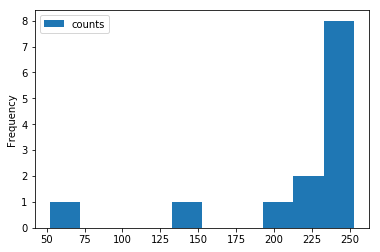

In [16]:
by_case = skyline_points.groupby('case').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
by_case.plot.hist()

In [17]:
by_case

,case,counts
4,daily.2019-09-09_01-34-02.csv,253
5,daily.2019-09-11_05-40-02.csv,253
6,daily.2019-09-13_04-11-01.csv,253
7,daily.2019-09-15_01-41-01.csv,253
8,daily.2019-09-16_19-44-01.csv,253
9,daily.2019-09-18_14-08-01.csv,253
10,daily.2019-09-20_12-49-01.csv,253
11,daily.2019-09-22_07-40-01.csv,253
1,daily.2019-09-03_03-44-01.csv,231
2,daily.2019-09-04_23-23-01.csv,231


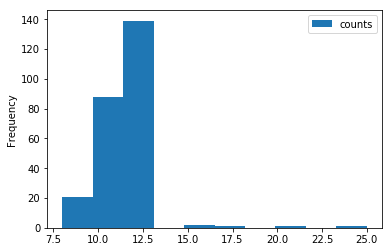

In [18]:
by_activity = skyline_points.groupby('activity').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
#print(by_activity)
by_activity.plot.hist()

In [19]:
by_activity.head()

,activity,counts
72,CrawlTask(crawler=creepy-crawly)(chunk=01),25
74,CrawlTask(crawler=creepy-crawly)(chunk=03),20
135,ExtractTask(crawler=creepy-crawly)(chunk=03),17
133,ExtractTask(crawler=creepy-crawly)(chunk=01),16
73,CrawlTask(crawler=creepy-crawly)(chunk=02),15


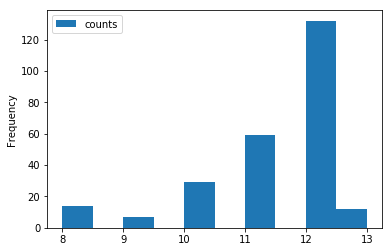

In [20]:
representative = skyline_points[['case','activity']].drop_duplicates()
r_by_activity = representative.groupby('activity').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
r_by_activity.plot.hist()

In [21]:
r_by_activity.head()

,activity,counts
124,DumpTask(target_filename=review_2019_2)(chunk=prep)(sql_filename=review),13
172,ProxySetupTask,13
87,DumpTask(target_filename=None)(chunk=prep)(sql_filename=other_urls),13
88,DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls),13
74,CrawlTask(crawler=creepy-crawly)(chunk=03),13


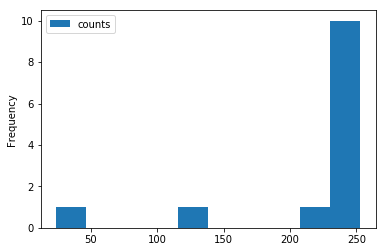

In [22]:
r_by_case = representative.groupby('case').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
r_by_case.plot.hist()

In [23]:
r_by_case

,case,counts
4,daily.2019-09-09_01-34-02.csv,253
5,daily.2019-09-11_05-40-02.csv,253
6,daily.2019-09-13_04-11-01.csv,253
7,daily.2019-09-15_01-41-01.csv,253
8,daily.2019-09-16_19-44-01.csv,253
9,daily.2019-09-18_14-08-01.csv,253
10,daily.2019-09-20_12-49-01.csv,253
11,daily.2019-09-22_07-40-01.csv,253
1,daily.2019-09-03_03-44-01.csv,231
2,daily.2019-09-04_23-23-01.csv,231


In [24]:
#print(len(skyline_points), 'points are part of skylines')
unique_sk_activities = skyline_points['activity'].unique().tolist()
#print(len(unique_sk_activities), 'activities in the skyline')
skyline_points.groupby('case').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

activities=[]
for i, case in enumerate(skyline_points['case'].unique()):
    acts = skyline_points[skyline_points['case']==case]['activity'].unique().tolist()
    activities.append(acts)
    #print(case, len(acts))

representative = skyline_points[['case','activity']].drop_duplicates()
rep_appereances = representative.groupby(by = ['activity']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
#rep_appereances = skyline_points.groupby(by = ['activity']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

pd.set_option('display.max_rows', None)
print('\n',len(rep_appereances), 'Activities appear in the skyline:')
rep_appereances.head()
#rep_appereances[rep_appereances['counts']<13]

#rep_appereances.groupby(by = ['counts']).size().reset_index(name='activities').sort_values(by=['counts'], ascending=False)


 253 Activities appear in the skyline:


,activity,counts
124,DumpTask(target_filename=review_2019_2)(chunk=prep)(sql_filename=review),13
172,ProxySetupTask,13
87,DumpTask(target_filename=None)(chunk=prep)(sql_filename=other_urls),13
88,DumpTask(target_filename=None)(chunk=prep)(sql_filename=regular_urls),13
74,CrawlTask(crawler=creepy-crawly)(chunk=03),13
